In [7]:
from quantum_logical.operators import (
    selective_destroy,
    reduce_to_two_qubit_subspace,
)
from quantum_logical.interaction import ConversionGainInteraction
from weylchamber import c1c2c3
import numpy as np
import qutip
from qutip.operators import destroy

$$\hat{H} = (a_{ge} + a_{ef})(b_{ge} + b_{ge}^\dagger + b_{ef} + b_{ef}^\dagger) + \text{h.c.}$$


In [8]:
op = (
    selective_destroy(levels=3, from_level=1, to_level=0)
    + selective_destroy(3, 1, 0).dag()
    + selective_destroy(3, 2, 1)
    + selective_destroy(3, 2, 1).dag()
)
w = qutip.identity(3) + (1 / np.sqrt(2) * op)
w

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[1.         0.70710678 0.        ]
 [0.70710678 1.         0.70710678]
 [0.         0.70710678 1.        ]]

In [9]:
H = qutip.tensor(w, w)
H

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[1.         0.70710678 0.         0.70710678 0.5        0.
  0.         0.         0.        ]
 [0.70710678 1.         0.70710678 0.5        0.70710678 0.5
  0.         0.         0.        ]
 [0.         0.70710678 1.         0.         0.5        0.70710678
  0.         0.         0.        ]
 [0.70710678 0.5        0.         1.         0.70710678 0.
  0.70710678 0.5        0.        ]
 [0.5        0.70710678 0.5        0.70710678 1.         0.70710678
  0.5        0.70710678 0.5       ]
 [0.         0.5        0.70710678 0.         0.70710678 1.
  0.         0.5        0.70710678]
 [0.         0.         0.         0.70710678 0.5        0.
  1.         0.70710678 0.        ]
 [0.         0.         0.         0.5        0.70710678 0.5
  0.70710678 1.         0.70710678]
 [0.         0.         0.         0.         0.5        0.70710678
  0.         0.70710678 1.        ]]

In [10]:
t = np.pi / 2
u = (-1j * H * t).expm()
u

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = False
Qobj data =
[[ 0.25      -0.25j -0.35355339+0.j    0.25      +0.25j -0.35355339+0.j
   0.        +0.j    0.35355339+0.j    0.25      +0.25j  0.35355339+0.j
   0.25      -0.25j]
 [-0.35355339+0.j    0.5       +0.j   -0.35355339+0.j    0.        +0.j
   0.        +0.j    0.        +0.j    0.35355339+0.j    0.5       +0.j
   0.35355339+0.j  ]
 [ 0.25      +0.25j -0.35355339+0.j    0.25      -0.25j  0.35355339+0.j
   0.        +0.j   -0.35355339+0.j    0.25      -0.25j  0.35355339+0.j
   0.25      +0.25j]
 [-0.35355339+0.j    0.        +0.j    0.35355339+0.j    0.5       +0.j
   0.        +0.j    0.5       +0.j   -0.35355339+0.j    0.        +0.j
   0.35355339+0.j  ]
 [ 0.        +0.j    0.        +0.j    0.        +0.j    0.        +0.j
   1.        +0.j    0.        +0.j    0.        +0.j    0.        +0.j
   0.        +0.j  ]
 [ 0.35355339+0.j    0.        +0.j   -0.35355339+0.j    0.5       +0.j
   0. 

In [11]:
# verify makes an CZ_gf gate
reduced_matrix = reduce_to_two_qubit_subspace(u, [0, 2])
print(reduced_matrix)
print(c1c2c3(reduced_matrix))
u

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.25-0.25j 0.25+0.25j 0.25+0.25j 0.25-0.25j]
 [0.25+0.25j 0.25-0.25j 0.25-0.25j 0.25+0.25j]
 [0.25+0.25j 0.25-0.25j 0.25-0.25j 0.25+0.25j]
 [0.25-0.25j 0.25+0.25j 0.25+0.25j 0.25-0.25j]]
(0.8420511, 0.1579489, 0.19879181)


Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = False
Qobj data =
[[ 0.25      -0.25j -0.35355339+0.j    0.25      +0.25j -0.35355339+0.j
   0.        +0.j    0.35355339+0.j    0.25      +0.25j  0.35355339+0.j
   0.25      -0.25j]
 [-0.35355339+0.j    0.5       +0.j   -0.35355339+0.j    0.        +0.j
   0.        +0.j    0.        +0.j    0.35355339+0.j    0.5       +0.j
   0.35355339+0.j  ]
 [ 0.25      +0.25j -0.35355339+0.j    0.25      -0.25j  0.35355339+0.j
   0.        +0.j   -0.35355339+0.j    0.25      -0.25j  0.35355339+0.j
   0.25      +0.25j]
 [-0.35355339+0.j    0.        +0.j    0.35355339+0.j    0.5       +0.j
   0.        +0.j    0.5       +0.j   -0.35355339+0.j    0.        +0.j
   0.35355339+0.j  ]
 [ 0.        +0.j    0.        +0.j    0.        +0.j    0.        +0.j
   1.        +0.j    0.        +0.j    0.        +0.j    0.        +0.j
   0.        +0.j  ]
 [ 0.35355339+0.j    0.        +0.j   -0.35355339+0.j    0.5       +0.j
   0. 

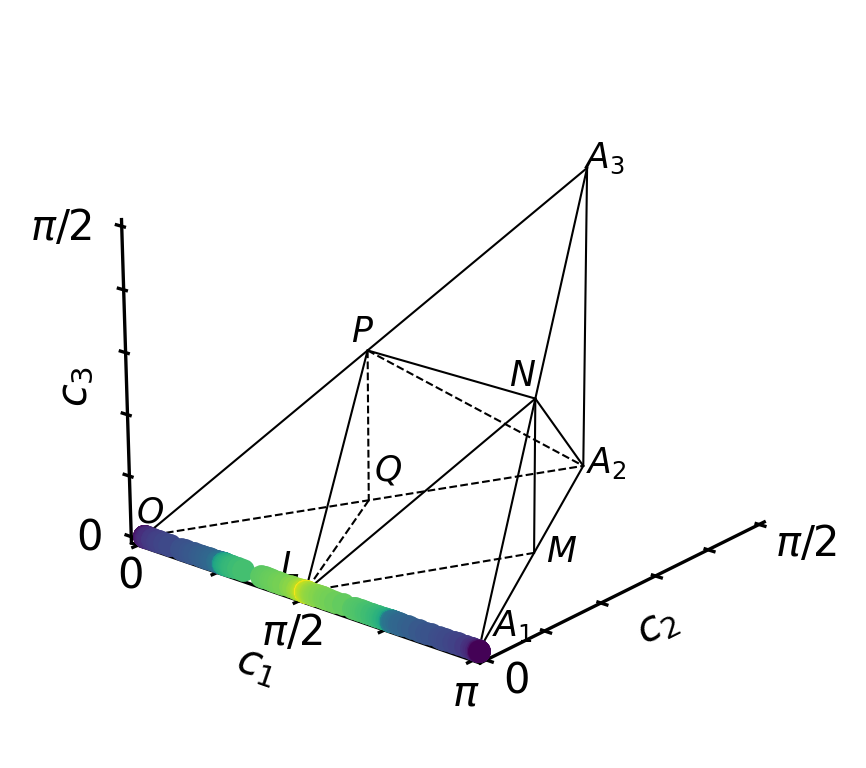

In [12]:
# cartan trajectory, plot coord as function of t
# !pip uninstall -y matplotlib && pip install matplotlib==3.7.2
import matplotlib.pyplot as plt
import numpy as np
from weylchamber import WeylChamber

wc = WeylChamber()

N = 250
coord_list = []
# Create a colormap object
cmap = plt.get_cmap("viridis")

for i, t in enumerate(np.linspace(0, np.pi, N)):
    # Normalize the loop index 'i' to be between 0 and 1
    color = cmap(i / (N - 1))
    u = (-1j * H * t).expm()
    reduced_matrix = reduce_to_two_qubit_subspace(u, [0, 2])
    coord = c1c2c3(reduced_matrix)
    wc.scatter(*coord, color=color)

wc.plot()

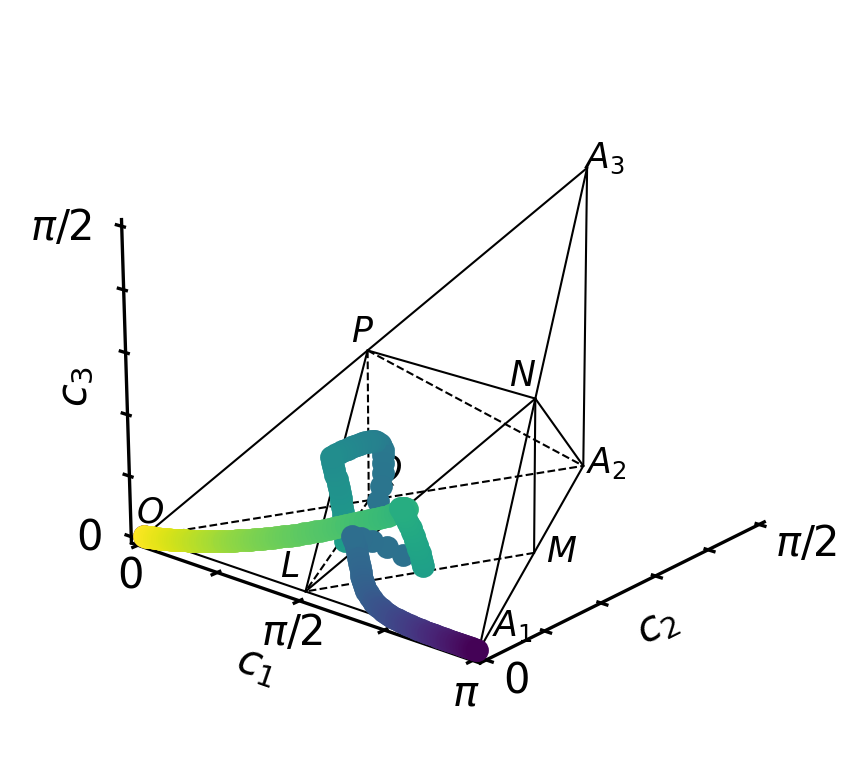

In [13]:
# cartan trajectory, plot coord as function of t
# !pip uninstall -y matplotlib && pip install matplotlib==3.7.2
import matplotlib.pyplot as plt
import numpy as np
from weylchamber import WeylChamber

wc = WeylChamber()

N = 250
coord_list = []
# Create a colormap object
cmap = plt.get_cmap("viridis")

for i, t in enumerate(np.linspace(0, np.pi, N)):
    # Normalize the loop index 'i' to be between 0 and 1
    color = cmap(i / (N - 1))
    u = (-1j * H * t).expm()
    reduced_matrix = reduce_to_two_qubit_subspace(u, [0, 1])
    coord = c1c2c3(reduced_matrix)
    wc.scatter(*coord, color=color)

wc.plot()